# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [Auger Eloise]([link](https://github.com/eloiseauger))
- [Buscaylet Alexandre]([link](https://github.com/buscaaa))

In [ ]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [4]:
import numpy as np

rng = np.random.default_rng(12345)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

**Answer:**

In [5]:
def brownian_motion(niter, x, step, rng):
    x = np.asarray(x)
    W = [x.copy()]
    intersection = None
    for i in range(niter):
        G = rng.normal(0, 1, size=2)
        x_new = W[-1] + np.sqrt(step) * G
        if np.linalg.norm(x_new) > 1: # if new calculated point is outside the ball
            # Interpolate to boundary
            x0 = W[-1]
            dx = x_new - x0
            # Solve ||x0 + t*dx||^2 = 1 for t in [0,1]
            a = np.dot(dx, dx)
            b = 2 * np.dot(x0, dx)
            c = np.dot(x0, x0) - 1
            roots = np.roots([a, b, c])
            t = roots[(roots >= 0) & (roots <= 1)]
            if t.size > 0:
                t = t[0].real
                intersection = x0 + t * dx
                W.append(intersection)
            else:
                W.append(x_new)
            break
        W.append(x_new)
    return np.array(W), intersection


3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

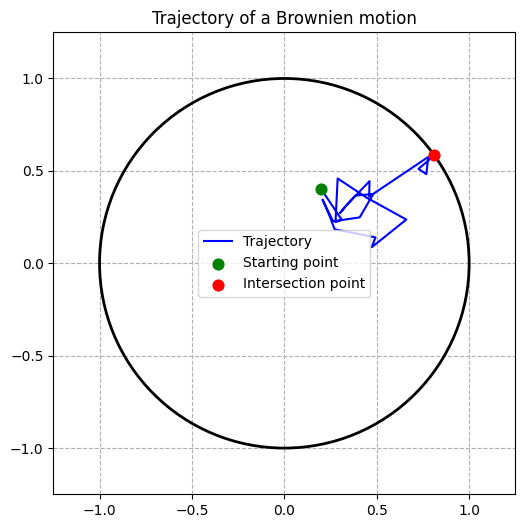

In [10]:
import matplotlib.pyplot as plt

# Parameters
x0 = (0.2, 0.4)
delta = 1e-2
N = 1000

W, intersection = brownian_motion(N, x0, delta, rng)

# Plot
circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2, zorder=2)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(W[:, 0], W[:, 1], label='Trajectory', color='blue', zorder=3)
ax.scatter(W[0, 0], W[0, 1], color='green', s=60, label='Starting point', zorder=4)
if intersection is not None:
    ax.scatter(intersection[0], intersection[1], color='red', s=60, label='Intersection point', zorder=5)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.grid(linestyle="--", zorder=1)
ax.set_aspect(1)
ax.add_artist(circle)
ax.legend()
plt.title('Trajectory of a Brownien motion')
plt.show()


4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

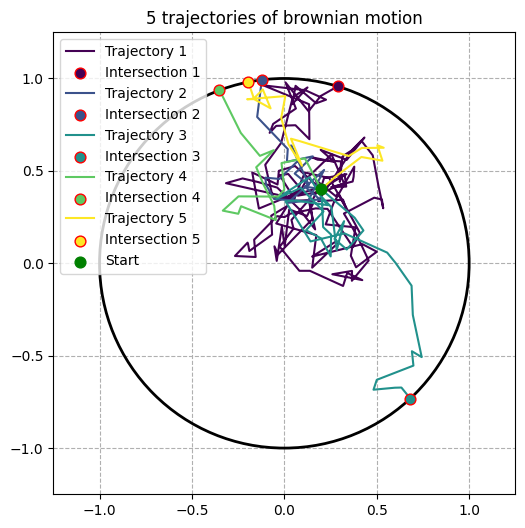

In [13]:
# Parameters
x0 = (0.2, 0.4)
delta = 1e-2
N = 1000
n_traj = 5

fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2, zorder=2)
ax.add_artist(circle)
colors = plt.cm.viridis(np.linspace(0, 1, n_traj))

for i in range(n_traj):
    rng_i = np.random.default_rng(12345 + i)
    W, intersection = brownian_motion(N, x0, delta, rng_i)
    ax.plot(W[:, 0], W[:, 1], color=colors[i], label=f'Trajectory {i+1}', zorder=3)
    if intersection is not None:
        ax.scatter(intersection[0], intersection[1], color=colors[i], s=60, edgecolor='red', label=f'Intersection {i+1}', zorder=4)

ax.scatter(x0[0], x0[1], color='green', s=60, label='Start', zorder=5)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.grid(linestyle="--", zorder=1)
ax.set_aspect(1)
ax.legend()
plt.title('5 trajectories of brownian motion')
plt.show()


5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [ ]:
# your code

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

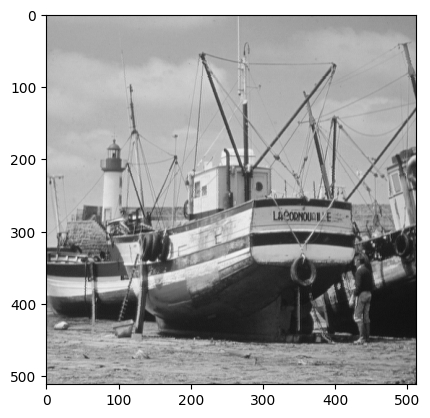

In [21]:
from matplotlib import image as mpimg
import os

import matplotlib.pyplot as plt

img_folder = 'img'
img_files = [f for f in os.listdir(img_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))]

# Load the first image
img_path = os.path.join(img_folder, img_files[0])
X = mpimg.imread(img_path)
X = X[:,:,0]

plt.imshow(X, cmap='gray')
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

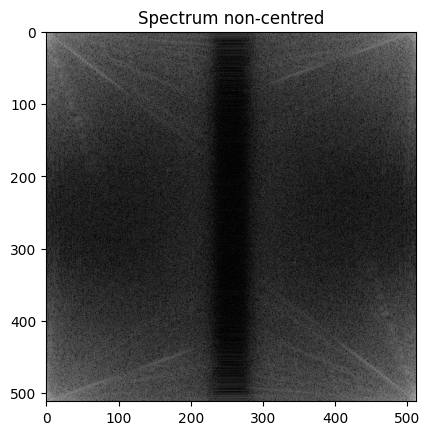

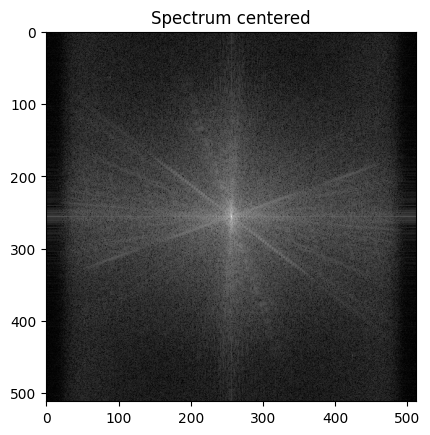

In [22]:
F = np.fft.fft2(X)                # transformée de Fourier 2D
S = np.abs(F)**2                  # module au carré
S_log = np.log1p(S)               # echelle logarithmique

plt.imshow(S_log, cmap='gray')
plt.title('Spectrum non-centred')
plt.show()

# centrage fréquence nulle
S_shifted = np.fft.fftshift(S_log)
plt.imshow(S_shifted, cmap='gray')
plt.title('Spectrum centered')
plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

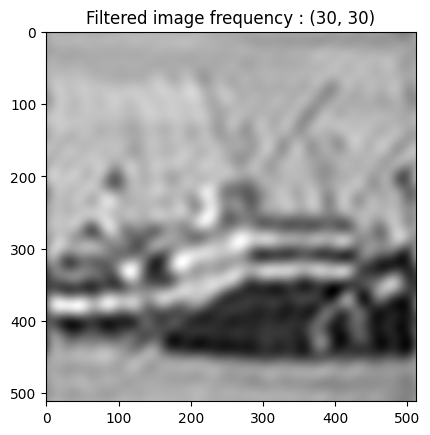

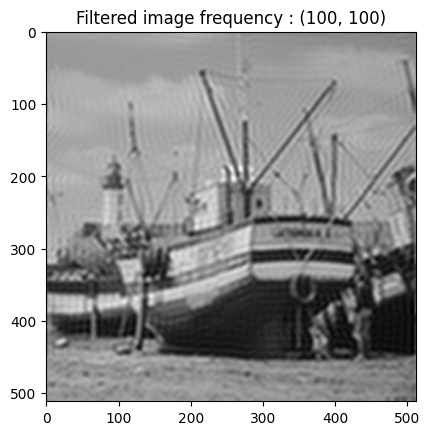

In [ ]:
def ideal_lowpass_filter(X, fc):
    # 2D FFT
    F = np.fft.fft2(X)
    F_shifted = np.fft.fftshift(F)
    M, N = F.shape
    fc_y, fc_x = fc
    # Create filter
    F_filtered = np.zeros_like(F_shifted, dtype=np.complex128)
    cy, cx = M // 2, N // 2
    F_filtered[cy - fc_y//2 : cy + fc_y//2, cx - fc_x//2 : cx + fc_x//2] = F_shifted[cy - fc_y//2 : cy + fc_y//2, cx - fc_x//2 : cx + fc_x//2]
    # Inverse FFT
    F_filtered = np.fft.ifftshift(F_filtered)
    X_filtered = np.fft.ifft2(F_filtered)
    return np.real(X_filtered)

# Test parameters
fc1 = (30,30)
fc2 = (100,100)


for fc in [fc1, fc2]:
    img = ideal_lowpass_filter(X, fc)
    plt.figure()
    plt.title(f"Filtered image frequency : {fc}")
    plt.imshow(img,cmap='gray')
    plt.show()


With a small cutoff frequency, the image looks very blurred because only low frequencies are kept.
With a larger cutoff frequency, the image becomes sharper as more details are preserved.

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

**Answer:**

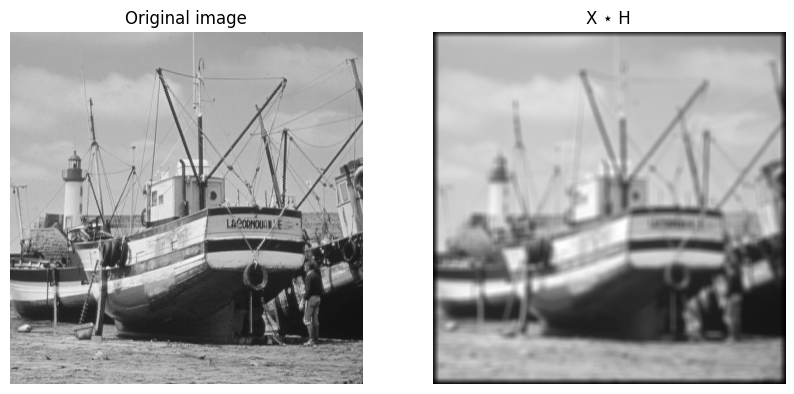

In [36]:
from scipy.signal.windows import gaussian

# --- Parameters ---
M2 = N2 = 10
sigma_y = 10
sigma_x = 10

# Gaussian windows
w_y = gaussian(M2, std=sigma_y)[:, np.newaxis]   # colonne
w_x = gaussian(N2, std=sigma_x)[np.newaxis, :]   # ligne

# Normalize
w_y = w_y / np.sum(w_y)
w_x = w_x / np.sum(w_x)

# 2D Gaussian kernel
H = w_y @ w_x

# --- Convolution via FFT with zero-padding ---
def conv_via_fft(X, H):
    M1, N1 = X.shape
    M2, N2 = H.shape
    M = M1 + M2 - 1
    N = N1 + N2 - 1

    P1 = np.zeros((M, N))
    P2 = np.zeros((M, N))
    P1[:M1, :N1] = X
    P2[:M2, :N2] = H

    F1 = np.fft.rfft2(P1)
    F2 = np.fft.rfft2(P2)
    Y = np.fft.irfft2(F1 * F2, s=(M, N))
    return Y


Y = conv_via_fft(X, H)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("X ⋆ H")
plt.imshow(Y, cmap="gray")
plt.axis("off")
plt.show()

When computing 𝑋 ⋆ 𝐻 the result is a smoothed version of the original image. The Gaussian kernel acts as a low-pass filter: it preserves low-frequency components and attenuates high-frequency components. As a result, edges and textures are blurred, while the overall shapes and brightness are maintained.
